In [164]:
import numpy as np
from scipy import signal, stats
from scipy.signal import spectrogram
from scipy.stats import levy_stable, kurtosis
from symulacja_py import impsim
import matplotlib.pyplot as plt
from matplotlib.mlab import window_none

In [92]:
def create_signal(alpha, impulse_amplitude, seed):
    fs = 25000
    fmod = 30
    f_center = 5000
    bandwidth = 1500
    shift = 0

    amp_imp = impulse_amplitude
    alfa = alpha
    skala = 1

    varsize = 1*fs
    tt_ts = np.linspace(1/fs,varsize/fs,varsize)
    #szum = np.random.normal(0,skala,varsize) #szum Gaussowski

    szum = levy_stable.rvs(alfa,0,0,skala,varsize, random_state=seed)  #szum alfa-stabilny

    signal_l = 2*impsim(fs,varsize,fmod,amp_imp,f_center,bandwidth,shift)+szum
    return signal_l

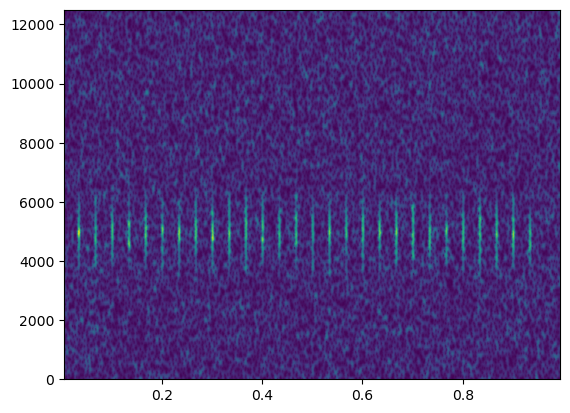

In [228]:
x = create_signal(2,9,0)
fig,ax = plt.subplots()
#Pxx, freqs, bins, im = plt.specgram(x=signal, NFFT=512, Fs=25000, Fc=None, detrend=None, sides="twosided", noverlap= int(np.floor(0.85*256)))
freqs, t, Pxx = spectrogram(x, fs=25000, nfft=512, window="hamming", nperseg= 256, noverlap= int(np.floor(0.85*256)),detrend = False, mode = "magnitude")#return_onesided=False)

ax.pcolormesh(t, freqs, Pxx, shading='gouraud')
plt.show()

In [229]:
#np.savetxt("./timeseries-alpha2-amplitude9.txt",signal)
np.savetxt("./magnitude-spectrogram-alpha2-amplitude9.txt", Pxx)
#len(freqs)
kurtosis(Pxx[222])

0.4978222377016661

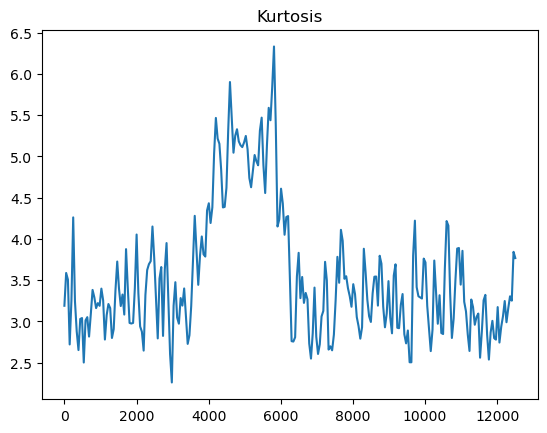

In [230]:
kurt_selector = kurtosis(np.abs(Pxx), axis =1, fisher=False)
f,ax = plt.subplots()
ax.plot(freqs, kurt_selector)
ax.set_title("Kurtosis")
plt.show()

In [220]:
def cvb(S):
    quantiles = np.concatenate([np.array([float("-inf")]),
                          np.array([np.quantile(S, q) for q in [0.004,
                          0.062,
                          0.308,
                          0.692,
                          0.938,
                          0.996]]),
                        np.array([float("inf")])])
    quantiles_partition = [S[(S>quantiles[i]) & (S <= quantiles[i+1])] for i in range(0,len(quantiles)-1)] 
    C1 = ((np.var(quantiles_partition[2])-np.var(quantiles_partition[3]))/np.var(S) + (np.var(quantiles_partition[4])-np.var(quantiles_partition[3]))/np.var(S))**2
    return C1*np.sqrt(len(S))

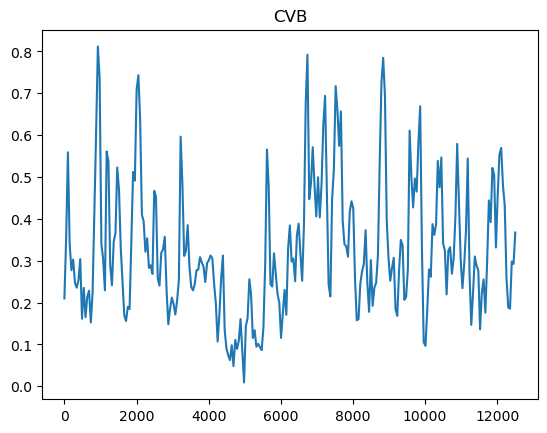

In [221]:
cvb_selector = [cvb(np.abs(Pxx[i])) for i in range(0,len(freqs))]
f,ax = plt.subplots()
ax.plot(freqs, cvb_selector)
ax.set_title("CVB")
plt.show()